# Data generator

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import functools

In [ ]:
def true_model(x):
  return np.sin(x**2 + 1)


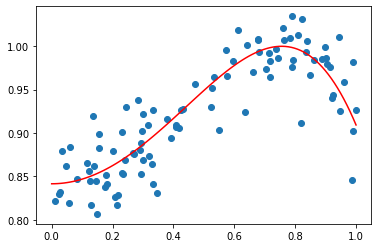

In [ ]:
N = 100
x = np.random.uniform(0, 1, N)
noise = np.random.normal(0, 0.03, N)
y = true_model(x) + noise
plt.scatter(x, y)
line_x =  np.linspace(0, 1, N)

plt.plot(line_x, true_model(line_x), 'r')

In [ ]:
def create_data(function, sample_size, loc, std,domain=(0,1)):
  x = np.random.uniform(domain[0], domain[1], sample_size)
  t = function(x) + np.random.normal(loc, std, sample_size)
  return x, t

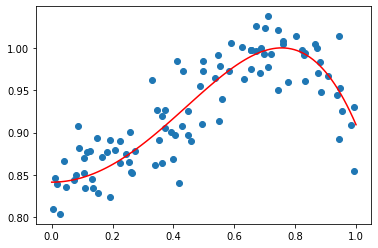

In [ ]:
x, t = create_data(lambda _: np.sin(_**2 + 1) , 100, 0, 0.03)
plt.scatter(x, t)
line_x = np.linspace(0, 1, 100)
plt.plot(line_x, np.sin(line_x**2 + 1), 'r')

In [ ]:
class Regression(object):
  pass

class LinearRegression(Regression):
  def fit(self, X:np.ndarray, t:np.ndarray):
    print(X.shape)
    self.w = np.linalg.pinv(X) @ t
    print(self.w.shape)
  def predict(self, X:np.ndarray):
    y =  X @ self.w
    return y


class PolynomialFeature(object):
    """
    polynomial features
    transforms input array with polynomial features
    Example
    =======
    x =
    [[a, b],
    [c, d]]
    y = PolynomialFeatures(degree=2).transform(x)
    y =
    [[1, a, b, a^2, a * b, b^2],
    [1, c, d, c^2, c * d, d^2]]
    """

    def __init__(self, degree=2):
        """
        construct polynomial features
        Parameters
        ----------
        degree : int
            degree of polynomial
        """
        assert isinstance(degree, int)
        self.degree = degree

    def transform(self, x):
        """
        transforms input array with polynomial features
        Parameters
        ----------
        x : (sample_size, n) ndarray
            input array
        Returns
        -------
        output : (sample_size, 1 + nC1 + ... + nCd) ndarray
            polynomial features
        """
        if x.ndim == 1:
            x = x[:, None]
        x_t = x.transpose()
        features = [np.ones(len(x))]
        for degree in range(1, self.degree + 1):
            for items in itertools.combinations_with_replacement(x_t, degree):
                features.append(functools.reduce(lambda x, y: x * y, items))
        return np.asarray(features).transpose()

(100, 16)
(16,)


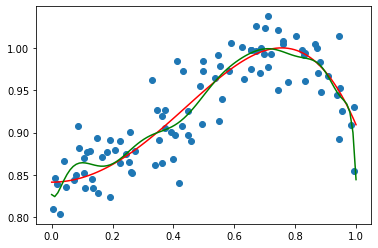

In [ ]:
model = LinearRegression()
x_test = np.linspace(0, 1, 100)
feature = PolynomialFeature(15)
X_train = feature.transform(x)
X_test = feature.transform(x_test)
model.fit(X_train, t)
y_predict = model.predict(X_test)
# print(X_test.shape)
plt.scatter(x, t)
plt.plot(line_x, np.sin(line_x**2 + 1), 'r')
plt.plot(x_test, y_predict, 'g')


In [ ]:
np.linspace(0, 1, 8)

array([0.        , 0.14285714, 0.28571429, 0.42857143, 0.57142857,
       0.71428571, 0.85714286, 1.        ])

In [ ]:
class RidgeRegression(Regression):
    """
    Ridge regression model
    w* = argmin |t - X @ w| + alpha * |w|_2^2
    """

    def __init__(self, alpha:float=1.):
        self.alpha = alpha

    def fit(self, X:np.ndarray, t:np.ndarray):
        """
        maximum a posteriori estimation of parameter
        Parameters
        ----------
        X : (N, D) np.ndarray
            training data independent variable
        t : (N,) np.ndarray
            training data dependent variable
        """

        # eye = np.eye(np.size(X, 1))
        # print(np.size(X, 1))
        # self.w = np.linalg.solve(self.alpha * eye + X.T @ X, X.T @ t)
        K = self.alpha * np.eye(X.shape[1]) + X.T @ X
        self.w = (np.linalg.inv(K) @ X.T) @ t



    def predict(self, X:np.ndarray):
        """
        make prediction given input
        Parameters
        ----------
        X : (N, D) np.ndarray
            samples to predict their output
        Returns
        -------
        (N,) np.ndarray
            prediction of each input
        """
        return X @ self.w

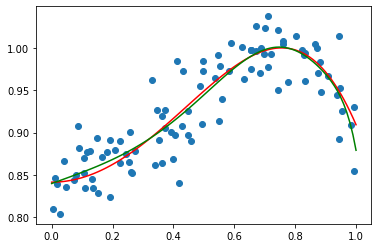

In [ ]:
model = RidgeRegression(0.001)
x_test = np.linspace(0, 1, 100)
feature = PolynomialFeature(20)
X_train = feature.transform(x)
X_test = feature.transform(x_test)
model.fit(X_train, t)
y_predict = model.predict(X_test)
# print(X_test.shape)
plt.scatter(x, t)
plt.plot(line_x, np.sin(line_x**2 + 1), 'r')
plt.plot(x_test, y_predict, 'g')